In [150]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import statsmodels.api as sm
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
import warnings
# import the_module_that_warns

warnings.filterwarnings("ignore")

from fbprophet import Prophet

In [151]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_df = pd.read_csv('sample_submission.csv')

In [152]:
train_df.head()

,id,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
0,0,26.68,11.86,19.77,14.83,7.90,2.96,5.93,4.94,4.94,...,1.97,0.98,2.96,4.94,6.91,9.88,0.00,2.96,7.90,4.94
1,1,107.73,77.09,79.09,4.94,48.44,22.74,33.61,23.72,23.72,...,11.85,11.85,19.76,22.73,38.54,145.28,56.33,62.26,58.31,32.61
2,2,94.88,90.93,78.10,66.24,38.55,25.70,27.68,26.69,18.78,...,0.00,0.00,0.00,0.00,81.04,130.45,71.15,0.00,0.00,0.00
3,3,0.00,0.00,149.29,51.41,6.92,8.89,2.96,2.96,1.97,...,0.00,0.00,5.92,26.68,74.12,158.12,159.11,105.75,86.97,43.48
4,4,97.85,97.85,70.19,60.31,31.63,25.70,20.76,22.74,20.76,...,8.89,8.89,16.80,22.73,20.75,26.68,32.61,19.76,21.74,15.81


In [153]:
train_df.shape

(78587, 126)

In [154]:
train_df

,id,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
0,0,26.68,11.86,19.77,14.83,7.90,2.96,5.93,4.94,4.94,...,1.97,0.98,2.96,4.94,6.91,9.88,0.00,2.96,7.90,4.94
1,1,107.73,77.09,79.09,4.94,48.44,22.74,33.61,23.72,23.72,...,11.85,11.85,19.76,22.73,38.54,145.28,56.33,62.26,58.31,32.61
2,2,94.88,90.93,78.10,66.24,38.55,25.70,27.68,26.69,18.78,...,0.00,0.00,0.00,0.00,81.04,130.45,71.15,0.00,0.00,0.00
3,3,0.00,0.00,149.29,51.41,6.92,8.89,2.96,2.96,1.97,...,0.00,0.00,5.92,26.68,74.12,158.12,159.11,105.75,86.97,43.48
4,4,97.85,97.85,70.19,60.31,31.63,25.70,20.76,22.74,20.76,...,8.89,8.89,16.80,22.73,20.75,26.68,32.61,19.76,21.74,15.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78582,78582,123.55,129.48,91.94,50.42,26.69,8.89,6.92,4.94,3.95,...,9.88,12.84,29.64,38.54,57.32,92.90,81.04,70.17,56.33,39.53
78583,78583,15.81,0.00,0.00,88.98,176.97,40.53,14.83,13.84,19.77,...,19.76,20.75,23.71,33.60,60.28,46.45,53.36,36.57,44.47,29.65
78584,78584,36.57,25.69,7.90,8.89,5.93,4.94,4.94,3.95,4.94,...,4.94,3.95,5.92,6.91,6.91,18.77,22.73,17.79,9.88,6.91
78585,78585,196.69,198.66,157.20,140.39,85.02,51.41,34.60,26.69,26.69,...,10.87,12.84,21.74,61.27,83.01,184.81,156.15,100.81,91.92,39.53


In [155]:
test_id = train_df.drop(['id'], axis = 1 ,inplace = False)
X = train_df.drop(sample_df.columns, axis = 1, inplace = False)
label = sample_df.columns[1:]
y = train_df[label]

In [156]:
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)
my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

In [157]:
train_y.shape

(58940, 12)

In [158]:
model = XGBRegressor()

# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y[:,0], verbose=False)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [159]:
predictions = my_model.predict(test_X)

In [160]:
predictions

array([89.32992  , 18.18122  , 23.565561 , ..., 12.015357 ,  6.3885145,
       21.333448 ], dtype=float32)

In [161]:
test_y.shape

(19647, 12)

In [162]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y[:,0])))

Mean Absolute Error : 9.176799873371625


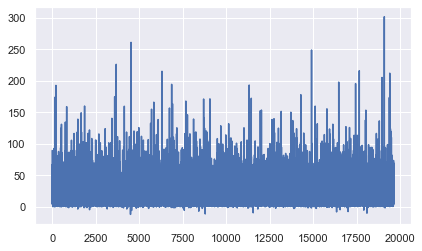

In [163]:
plt.plot(predictions)

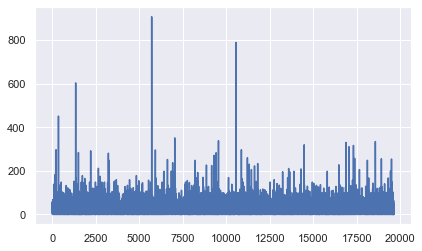

In [164]:
plt.plot(test_y[:,0])

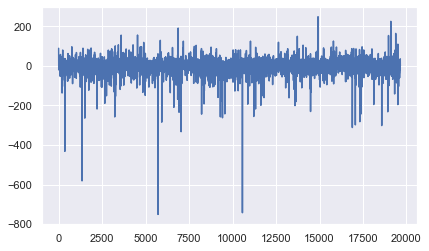

In [165]:
plt.plot(predictions - test_y[:,0])

In [148]:
from sklearn import preprocessing

In [149]:
labels = preprocessing.LabelEncoder().fit_transform(train_y[:,0])

In [ ]:
params = {"objective": "multi:softprob", "eval_metric":"mlogloss", "num_class": 9}